Comparacion con analisis realizado por deepseek

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth 

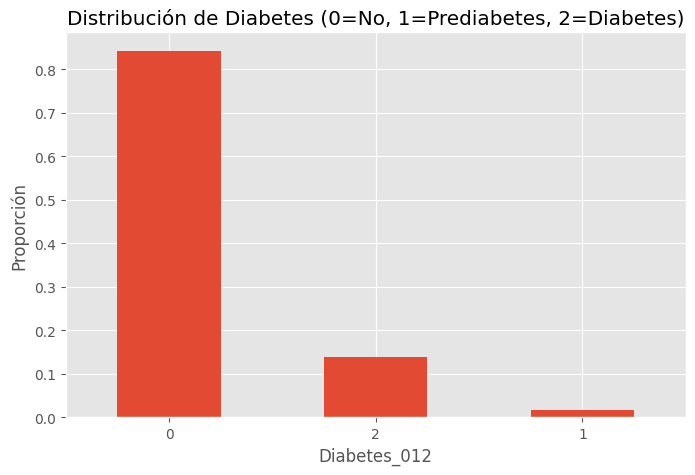

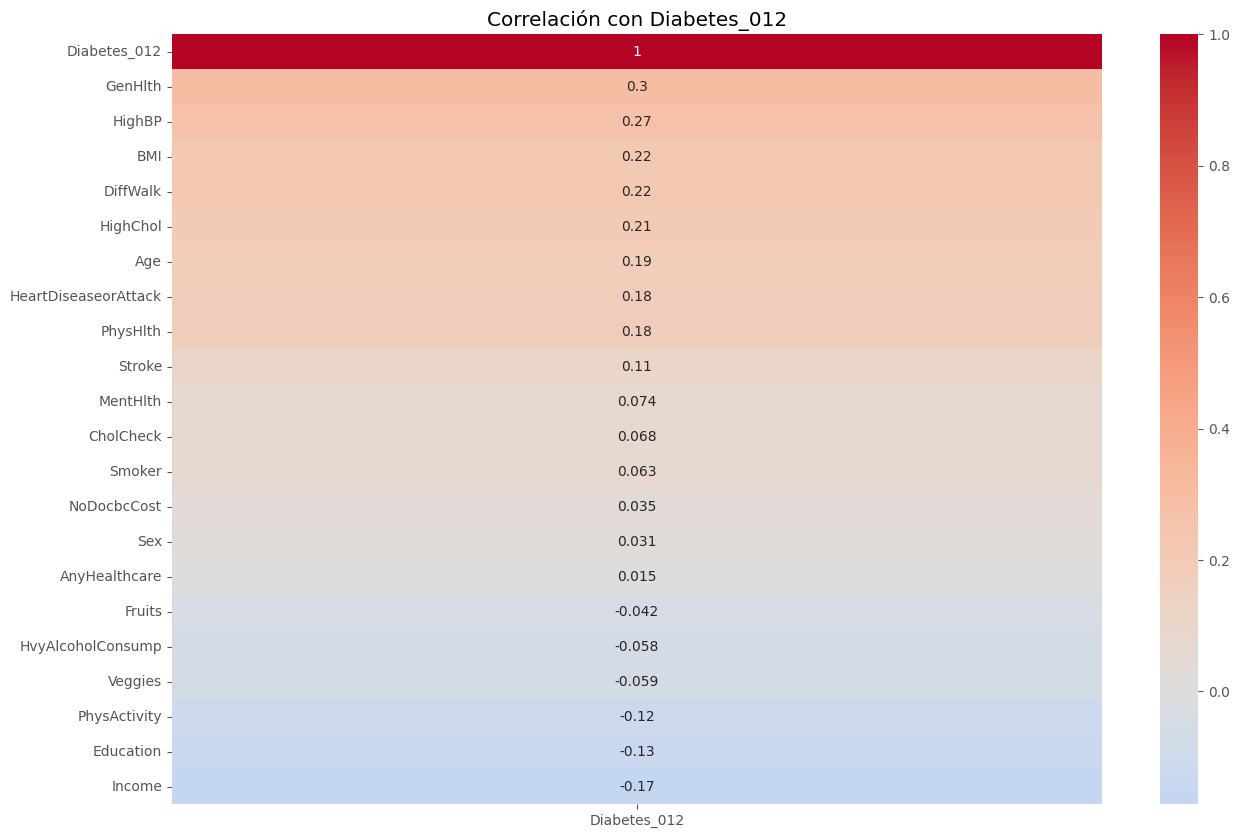

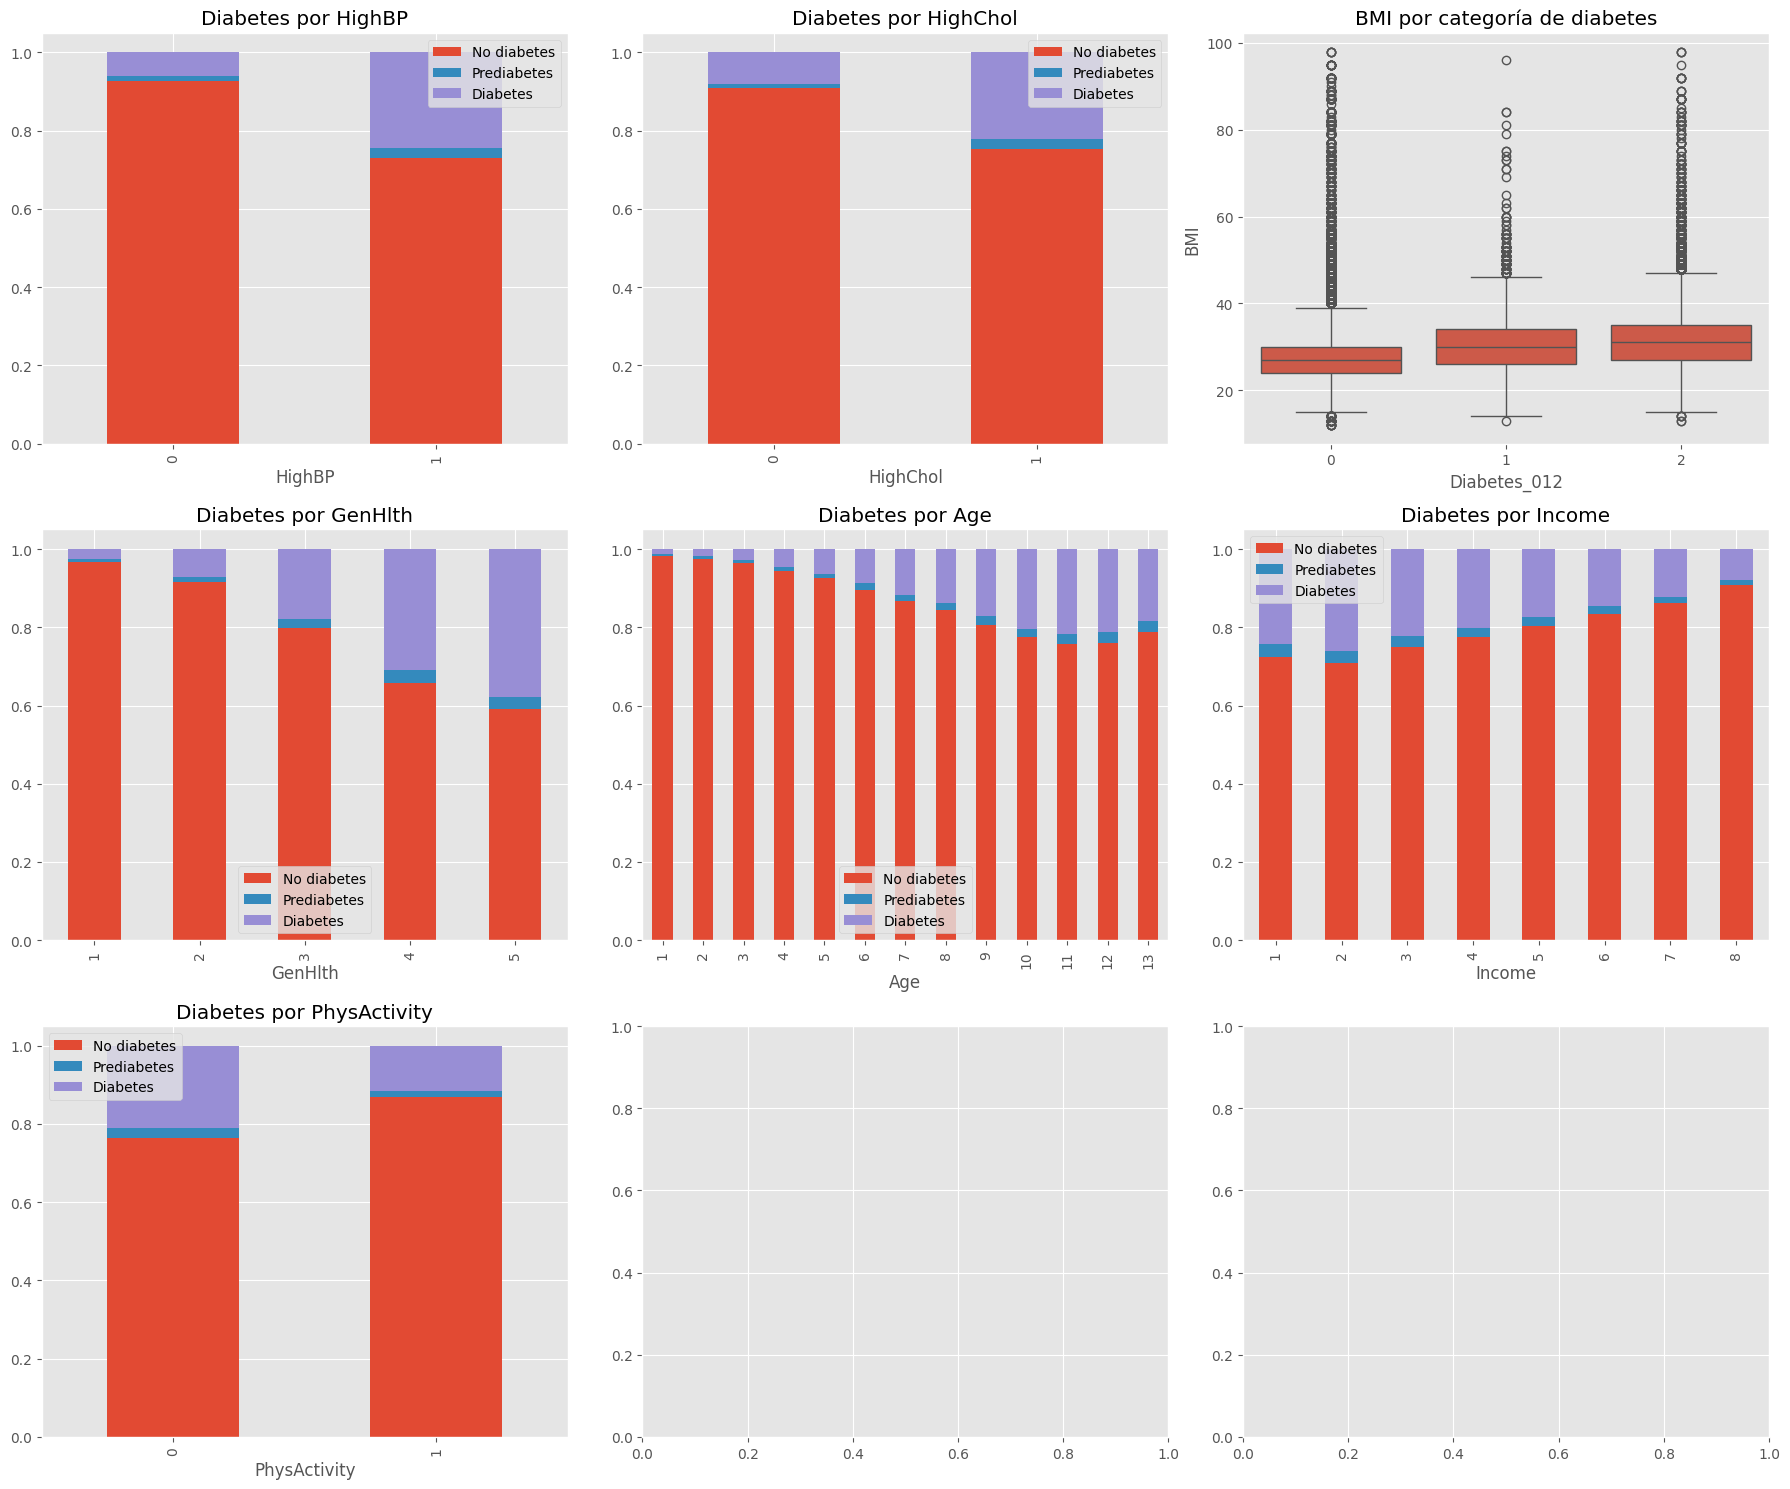

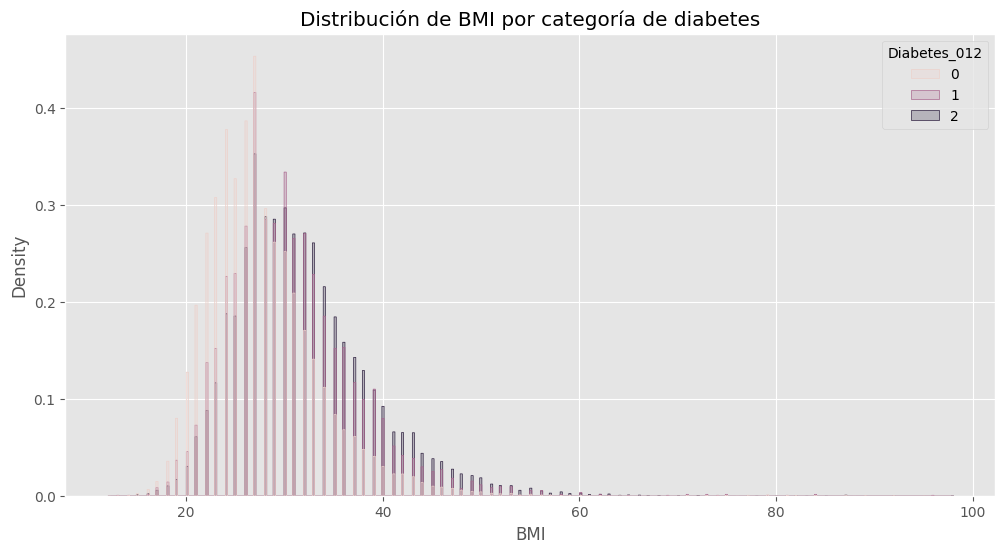

<Figure size 1200x600 with 0 Axes>

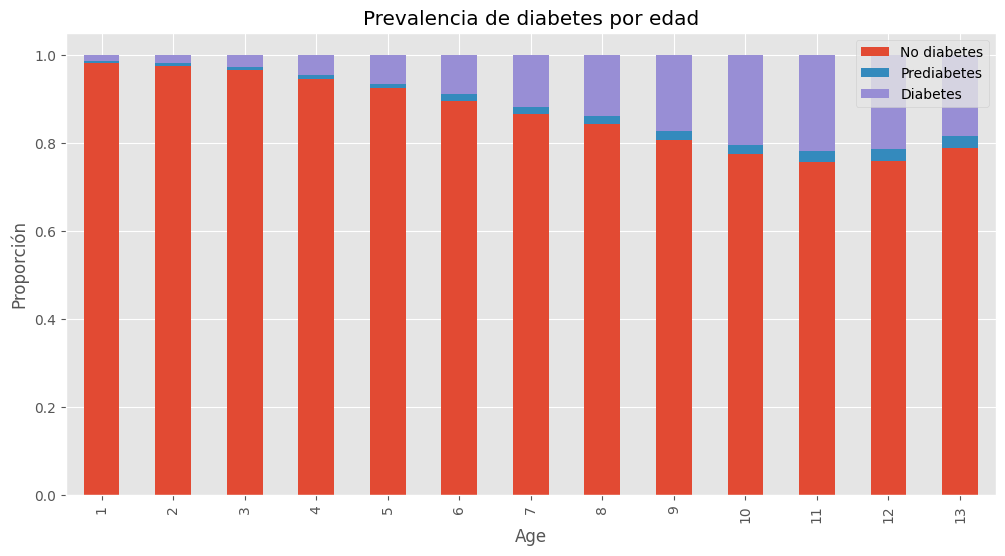

<Figure size 1200x600 with 0 Axes>

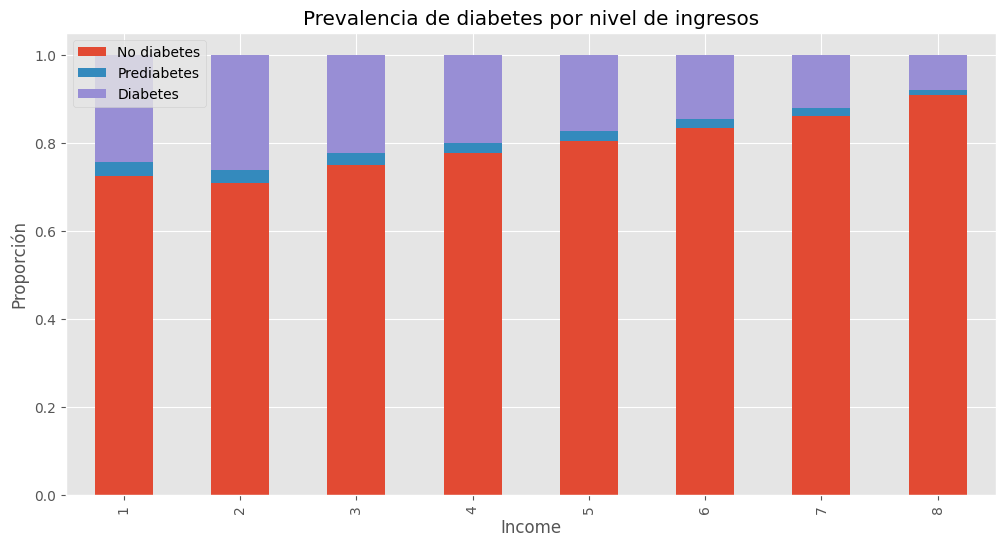


Prueba ANOVA para BMI entre grupos:
F-statistic: 6768.36, p-value: 0.0000

Prueba Tukey HSD para BMI:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   2.9819   0.0 2.7578 3.2061   True
     0      2   4.2015   0.0 4.1148 4.2881   True
     1      2   1.2195   0.0 0.9837 1.4554   True
-------------------------------------------------

Importancia de características (coeficientes):
                Variable  Coeficiente
2              CholCheck     1.232801
0                 HighBP     0.707611
1               HighChol     0.574825
13               GenHlth     0.512370
17                   Sex     0.245446
6   HeartDiseaseorAttack     0.210139
16              DiffWalk     0.131013
5                 Stroke     0.128200
18                   Age     0.124215
12           NoDocbcCost     0.079618
3                    BMI     0.061878
11         AnyHealthcare     0.006717
14 

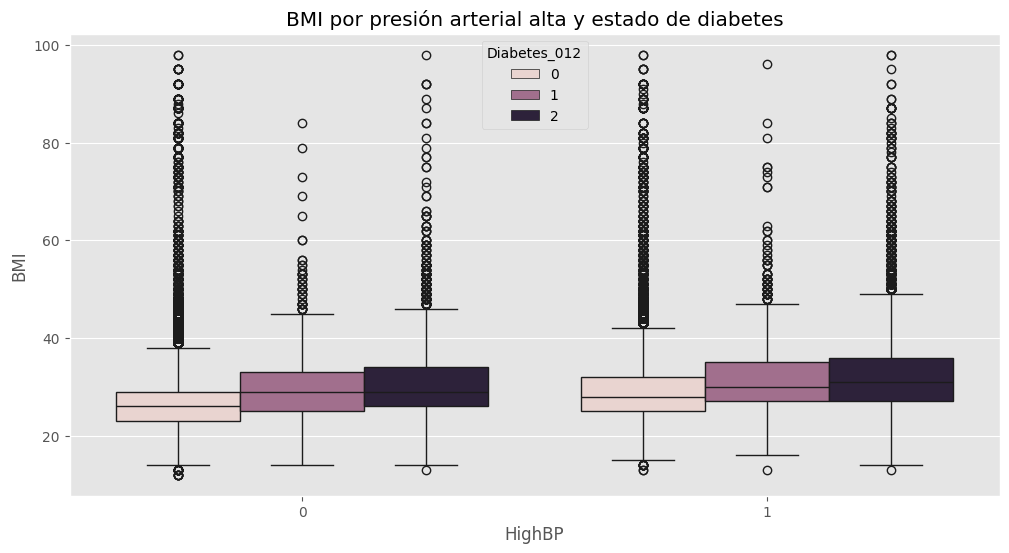

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', 50)

# Cargar los datos
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# 1. Análisis exploratorio inicial
print("Información del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# 2. Análisis de la variable objetivo
plt.figure(figsize=(8, 5))
df['Diabetes_012'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribución de Diabetes (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.show()

# 3. Correlaciones con la variable objetivo
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[['Diabetes_012']].sort_values(by='Diabetes_012', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación con Diabetes_012')
plt.show()

# 4. Análisis de variables clave
key_vars = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age', 'Income', 'PhysActivity']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    if var == 'BMI':
        sns.boxplot(x='Diabetes_012', y=var, data=df, ax=axes[i])
        axes[i].set_title(f'Indice de masa corporal por categoría de diabetes')
    else:
        pd.crosstab(df[var], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'Diabetes por {var}')
        axes[i].legend(['No diabetes', 'Prediabetes', 'Diabetes'])
    
plt.tight_layout()
plt.show()

# 5. Análisis de BMI
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='BMI', hue='Diabetes_012', element='step', stat='density', common_norm=False)
plt.title('Distribución de Indice de Masa corporal por categoría de diabetes')
plt.show()

# 6. Análisis de edad
plt.figure(figsize=(12, 6))
pd.crosstab(df['Age'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Prevalencia de diabetes por edad')
plt.ylabel('Proporción')
plt.legend(['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

# 7. Análisis de ingresos
plt.figure(figsize=(12, 6))
pd.crosstab(df['Income'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Prevalencia de diabetes por nivel de ingresos')
plt.ylabel('Proporción')
plt.legend(['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

# 8. Pruebas estadísticas
# Comparación de BMI entre grupos
no_diabetes = df[df['Diabetes_012'] == 0]['BMI']
prediabetes = df[df['Diabetes_012'] == 1]['BMI']
diabetes = df[df['Diabetes_012'] == 2]['BMI']

print("\nPrueba ANOVA para BMI entre grupos:")
f_stat, p_val = stats.f_oneway(no_diabetes, prediabetes, diabetes)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

# Prueba post-hoc (Tukey)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['BMI'], groups=df['Diabetes_012'], alpha=0.05)
print("\nPrueba Tukey HSD para BMI:")
print(tukey)

# 9. Modelo de regresión logística (simplificado)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012'].astype('category')  # Para manejar como clasificación multiclase

# Convertir a binario para modelo simplificado (diabetes vs no diabetes)
y_binary = (df['Diabetes_012'] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("\nImportancia de características (coeficientes):")
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})
print(coef_df.sort_values('Coeficiente', ascending=False))

# Evaluación del modelo
y_pred = model.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 10. Análisis de interacciones
# Ejemplo: BMI y HighBP
plt.figure(figsize=(12, 6))
sns.boxplot(x='HighBP', y='BMI', hue='Diabetes_012', data=df)
plt.title('BMI por presión arterial alta y estado de diabetes')
plt.show()